                                                               Independent Component Analysis - ML                                                                

# Independent Component Analysis - ML

Independent Component Analysis (ICA) is a technique used to separate mixed signals into their independent, non-Gaussian components. Its aim to find a linear transformation of data that maximizes statistical independence among the components. ICA is widely used in fields like audio, image processing and biomedical signal analysis to isolate distinct sources from mixed signals.

## Statistical Independence Concept

Statistical independence refers to the idea that two random variables: X and Y are independent if knowing one does not affect the probability of the other. Mathematically, this means the joint probability of X and Y is equal to the product of their individual probabilities.

P(X, Y) = P(X) * P(Y)

In the context of ICA, we want to find a transformation that makes the components as independent as possible. This is often achieved by maximizing a measure of non-Gaussianity such as kurtosis or negentropy.

**Assumptions in ICA**

ICA operates under two key assumptions:

* The source signals are statistically independent of each other.
* The source signals have non-Gaussian distributions.

These assumptions allow ICA to effectively separate mixed signals into independent components, a task that traditional methods like PCA cannot achieve

## Mathematical Representation of ICA

Mathematically, ICA can be represented as follows:
X = AS

Where:
* X is the observed data matrix (mixed signals).
* A is the mixing matrix that combines the independent components.
* S is the source matrix containing the independent components.

The goal of ICA is to estimate the unmixing matrix W such that:
S = WX

## Cocktail Party Problem in ICA

The cocktail party problem is a classic example of ICA where the task is to separate individual voices from a mixture of sounds in a noisy environment. Imagine being at a cocktail party where multiple conversations are happening simultaneously. The goal is to isolate each person's voice from the background noise.

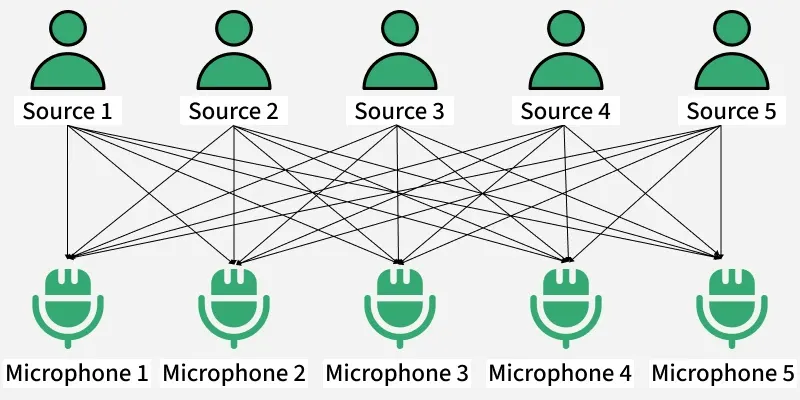

* There is 'n' number of speakers in that room and they are speaking simultaneously at the party.
* In the same room, there are also 'n' microphones placed at different distances from the speakers which are recording 'n' speakers' voice signals.

* Each microphone captures a mixture of all the speakers' voices, resulting in 'n' mixed signals.
* The task is to separate the individual voices from these mixed signals using ICA.


## Implementing ICA in Python

FastICA is a specific implementation of the Independent Component Analysis (ICA) algorithm that is designed for efficiency and speed.


In [1]:
# Import liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Generate Random Data with Missing signals

np.random.seed(42)
samples = 200
time = np.linspace(0, 8, samples)

signal_1 = np.sin(2 * time)
signal_2 = np.sign(np.sin(3 * time))
signal_3 = np.random.laplace(size=samples)

S = np.c_[signal_1, signal_2, signal_3]
S += 0.2 * np.random.normal(size=S.shape)

A = np.array([[1, 1, 1], [0.5, 2, 1], [1.5, 1, 2]])
X = S.dot(A.T)

* signal_1: A sine wave like a tuning fork tone.
* signal_2: A square wave like a digital signal (on/off).
* signal_3: A random noise signal using the Laplace distribution which has sharper peaks than normal distribution.
* np.c_[]: Combine all three 1D signals into a single 2D array.
* 0.2 is the standard deviation of the noise

In [3]:
## Apply ICA to unmix the signals
from sklearn.decomposition import FastICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)

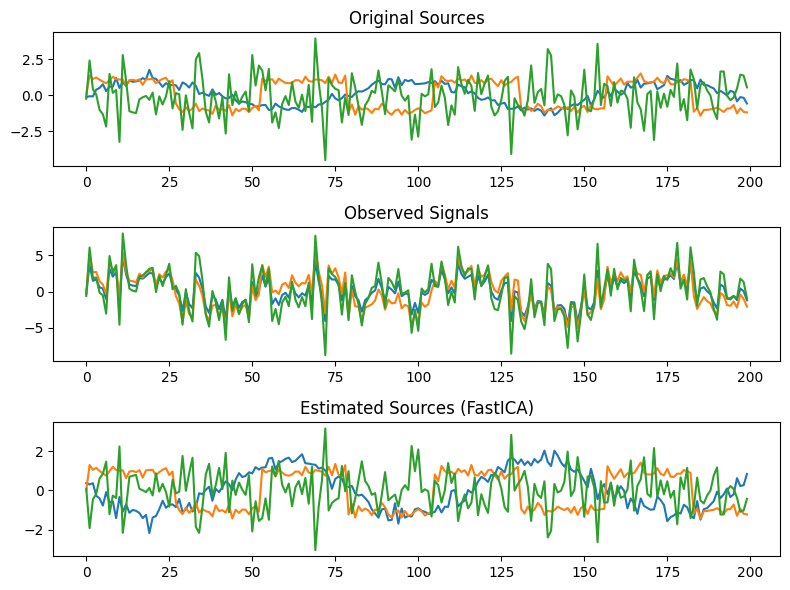

In [4]:
# Visualize the signals

plt.figure(figsize=(8, 6))

plt.subplot(3, 1, 1)
plt.title('Original Sources')
plt.plot(S)

plt.subplot(3, 1, 2)
plt.title('Observed Signals')
plt.plot(X)

plt.subplot(3, 1, 3)
plt.title('Estimated Sources (FastICA)')
plt.plot(S_)

plt.tight_layout()
plt.show()

We create three subplots:

* First shows the original synthetic signals
* Second displays the observed mixed signals
* Third shows the estimated independent sources obtained from ICA

## Advantages and Limitations of ICA

Advantages:
* ICA can separate mixed signals into their independent components, which is not possible with PCA.
* It is effective in applications like audio source separation and image processing. 
   
Limitations:

* ICA assumes that the source signals are statistically independent and non-Gaussian, which may not always hold true in real-world data.
* It can be sensitive to noise and outliers, which can affect the quality of the separation.

                                                                 Blind source separation using FastICA in Scikit Learn                                
                                         

# Blind source separation using FastICA in Scikit Learn


Blind Source Separation (BSS) refers to the process of separating signals when the source signals are unknown and the method of mixing is also unknown. FastICA is a widely used algorithm for solving this problem. It is commonly applied in fields like audio processing, medical imaging and financial data analysis. FastICA is of two types :

* **Deflation-based FastICA** where the components are found in one by one manner.
* **Symmetric FastICA** where the components are found simultaneously. 

It can also work with different nonlinearity function and optimize the extraction order in the deflation-based version. Even without knowing much about the signals or how they were mixed we can separate them using FastICA.

## Mathematical Explanation of FastICA Algorithm

The FastICA algorithm is based on the principle of maximizing non-Gaussianity to find independent components. The mathematical steps involved in the FastICA algorithm are as follows:

1. **Centering**: The observed data is centered by subtracting the mean from each variable.

2. **Whitening**: The centered data is whitened to make the covariance matrix of the data equal to the identity matrix. This is done using eigenvalue decomposition or singular value decomposition.

3. **Initialization**: An initial random weight vector is chosen for each independent component.

4. **Iteration**: The weight vectors are updated iteratively using a fixed-point algorithm to maximize the non-Gaussianity of the projected data. The update rule is given by:
w_new = E[X * g(w^T X)] - E[g'(w^T X)] * w

Where:

* w is the weight vector.
* X is the whitened data.
* g is a non-linear function (e.g., tanh, exp).
* E denotes the expectation operator.

5. **Normalization**: After each update, the weight vector is normalized to prevent it from growing indefinitely.

6. **Convergence**: The algorithm continues to iterate until the weight vectors converge to stable values, indicating that the independent components have been successfully separated.

## Python Implementation of FastICA



In [1]:
# import Liberaries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
import pandas as pd

* s1: Smooth periodic signal
* s2: Sharp square wave (high kurtosis)
* s3: Random Gaussian noise
* S: Shape=(2000,3) each column is one independent source
* X= observed signals (mixed)

In [2]:
# Generate Source Signals (Sine, Square, Noise)

np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time) 
s2 = np.sign(np.sin(3 * time))  
s3 = np.random.normal(0, 1, n_samples)  

S = np.c_[s1, s2, s3]

A = np.array([
    [1, 1, 1],
    [0.5, 2, 1.0],
    [1.5, 1.0, 2.0]
])

X = np.dot(S, A.T)

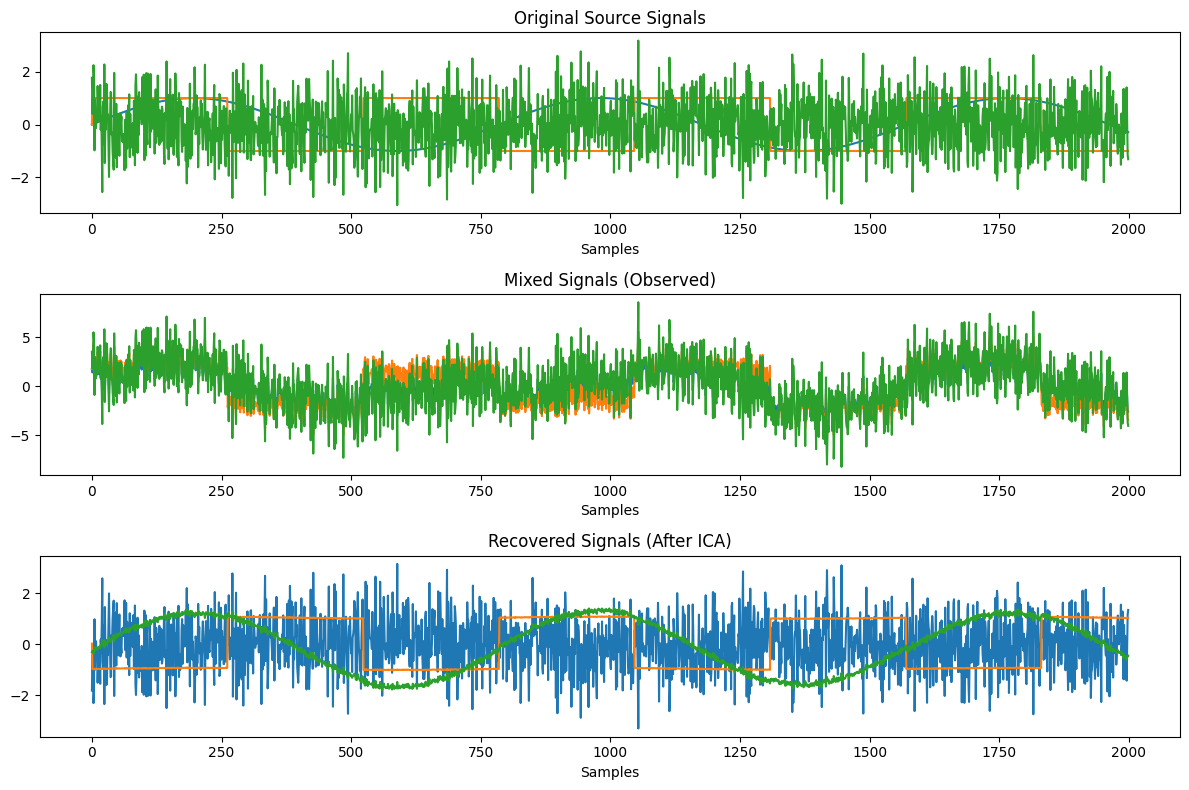

In [3]:
#  Apply FastICA to Recover the Signals

ica = FastICA(n_components=3)
S_estimated = ica.fit_transform(X)  
A_estimated = ica.mixing_

# Plot the Results (Original, Mixed, Recovered)

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.title("Original Source Signals")
plt.plot(S)
plt.xlabel("Samples")

plt.subplot(3, 1, 2)
plt.title("Mixed Signals (Observed)")
plt.plot(X)
plt.xlabel("Samples")

plt.subplot(3, 1, 3)
plt.title("Recovered Signals (After ICA)")
plt.plot(S_estimated)
plt.xlabel("Samples")

plt.tight_layout()
plt.show()



                                                        Isomap - A Non-linear Dimensionality Reduction Technique                            
                                         

## Isomap - A Non-linear Dimensionality Reduction Technique


Isomap (Isometric Mapping) is a non-linear dimensionality reduction method that reduces features while keeping the structure of the data intact. It works well when the data lies on a curved or complex surface.

* Handles non-linear datasets better than PCA
* Preserves true manifold-based distances
* Helps visualize high-dimensional patterns
* Useful for images, shapes and other curved data

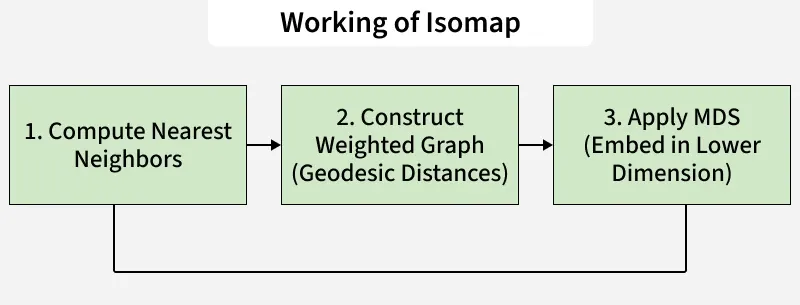

## Manifold Learning

Manifold learning is a type of non-linear dimensionality reduction technique that assumes that the high-dimensional data lies on a low-dimensional manifold. The goal of manifold learning is to find a low-dimensional representation of the data that preserves the structure of the manifold. Isomap is one such manifold learning technique that uses geodesic distances to preserve the intrinsic geometry of the data.

Manifold learning methods aim to unfold such shapes and find their simpler representation. In manifold learning we distinguish between two types of distances:

* **Geodesic Distance** is the shortest path between two points along the manifold’s surface
* **Euclidean Distance** is the straight-line distance between two points in the original space.

## How Does Isomap Work?

* **Calculate Pairwise Distances:** First we find the Euclidean distances between all pairs of data points.
* **Find Nearest Neighbors:** For each point find the closest other points based on distance.
* **Create a Neighborhood Graph:** Connect each point to its nearest neighbors to form a graph.
* **Calculate Geodesic Distances:** Use algorithms like Floyd-Warshall to measure the shortest paths between points by following the graph connections.
* **Perform Dimensional Reduction:** Move points into a simpler space while keeping their distances as accurate as possible.

## Implementation of Isomap with Scikit-learn


### 1. Applying Isomap to S-Curve Data

This part generates a 3D S-curve dataset and applies Isomap to reduce it to 2D for visualization. It highlights how Isomap preserves the non-linear structure by flattening the curve while keeping the relationships between points intact.

* make_s_curve() creates a 3D curved dataset shaped like an "S".
* Isomap() reduces the data to 2D while keeping its true structure.

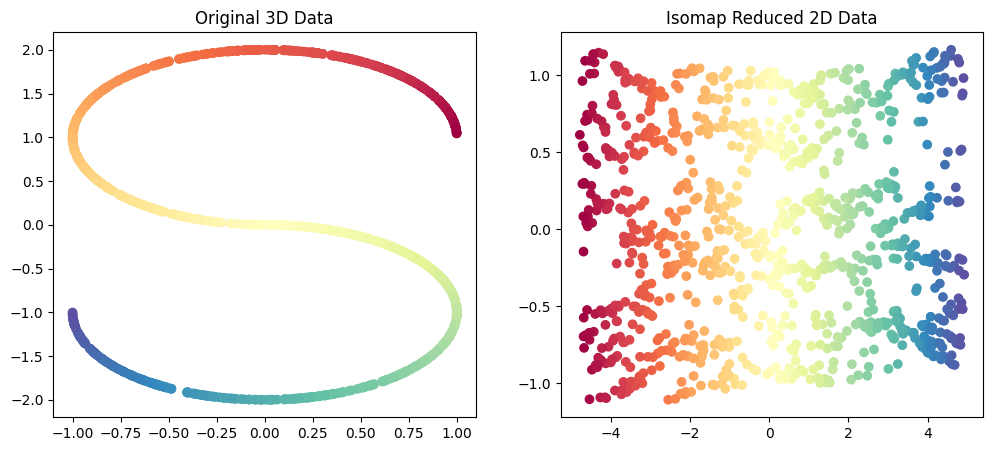

In [4]:
from sklearn.datasets import make_s_curve
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt

X, color = make_s_curve(n_samples=1000, random_state=42)

isomap = Isomap(n_neighbors=10, n_components=2)
X_isomap = isomap.fit_transform(X)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].scatter(X[:, 0], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax[0].set_title('Original 3D Data')

ax[1].scatter(X_isomap[:, 0], X_isomap[:, 1], c=color, cmap=plt.cm.Spectral)
ax[1].set_title('Isomap Reduced 2D Data')

plt.show()

###  Applying Isomap to Digits Dataset

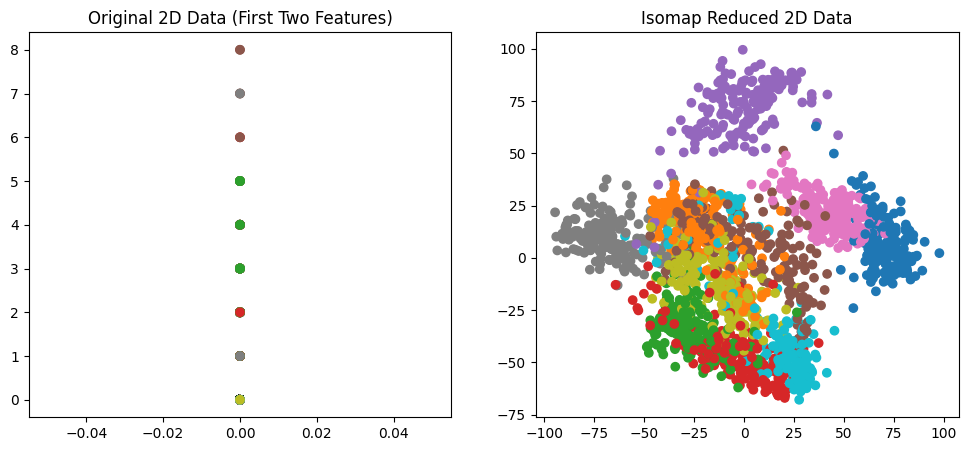

In [5]:
from sklearn.datasets import load_digits
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt

digits = load_digits()

isomap = Isomap(n_neighbors=30, n_components=2)
digits_isomap = isomap.fit_transform(digits.data)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].scatter(digits.data[:, 0], digits.data[:, 1], c=digits.target, cmap=plt.cm.tab10)
ax[0].set_title('Original 2D Data (First Two Features)')

ax[1].scatter(digits_isomap[:, 0], digits_isomap[:, 1], c=digits.target, cmap=plt.cm.tab10)
ax[1].set_title('Isomap Reduced 2D Data')

plt.show()

## Applications of Isomap

* **Visualization:** It makes it easier to see complex data like face images by turning it into 2D or 3D form so we can understand it better with plots or graphs.
* **Data Exploration:** It helps to find groups or patterns in the data that might be hidden when the data has too many features or dimensions.
* **Anomaly Detection:** Outliers or anomalies in the data can be identified by understanding how they deviate from the manifold.
* **Pre-processing for Machine Learning:** It can be used as a pre-processing step before applying other machine learning techniques to improve model performance.

## Advantages of Isomap

* **Captures Non-Linear Relationships:** Unlike PCA, Isomap can find complex, non-linear patterns in data.
* **Preserves Global Structure:** It retains the overall geometry of the data and provides a more accurate representation of the data relationships.
* **Global Optimal Solution:** It guarantees that the optimal solution is found for the neighborhood graph and ensures accurate dimensionality reduction.

## Limitations of Isomap

* **High Computation Time:** Computing geodesic distances and shortest paths becomes slow when the dataset is large.
* **Parameter Sensitivity:** Results vary a lot if parameters like number of neighbors are not chosen properly.
* **Issues with Complex Shapes:** It may not work well when the data lies on manifolds with holes or complex structures.